# Project Title - Analysis of Pollution Data

I hope to do some basic level analysis of a US Pollution dataset using Python libraries such as Pandas and Numpy, and create visual representations of this analysis using libraries like Matplotlib and Seaborn. This is a pretty large dataset, with data from over 21 years and 100,000+ locations. Example analyses include viewing pollution concentrations in both geographic and temporal resolution, creating and finding statistics to quantify pollution, and essentially see if the emissions of these toxic gases are decreasing over time (as a result of the Clean Air Act, passed in 1970s)

## Downloading the Dataset

**TODO** - add some explanation here

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/alpacanonymous/us-pollution-20002021'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aadrijupadya
Your Kaggle Key: ········


100%|██████████| 16.9M/16.9M [00:00<00:00, 48.0MB/s]


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './us-pollution-20002021'

In [5]:
import os
os.listdir(data_dir)

['pollution_2000_2021.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "pollution analysis" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "adrij2005/pollution-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/adrij2005/pollution-analysis


'https://jovian.ai/adrij2005/pollution-analysis'

## Data Preparation and Cleaning

Here, I did the initial steps in analyzing the data, including loading the dataset into a dataframe using Pandas, removing any negative/null values, grouping, and adding a new column to create a comprehensive quantitative statistic for total pollution output.


> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [10]:
import pandas as pd
pollution = pd.read_csv(data_dir + "/pollution_2000_2021.csv")
pollution.head()

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [11]:
pollution.shape #pretty large dataset

(608699, 24)

In [12]:
pollution.isnull().values.any()


False

As we can see, the dataset seems to be pretty full and contains no nulls

In [13]:
pollution.describe() #we notice that some values are negative. This must be fixed.

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337258,0.476798,5.971042,5.377387,1.523358,4.210271,8.851891,5.568708,11.738067,23.610711,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282958,0.446321,7.739380,5.142873,2.495094,7.983793,6.774720,10.736164,9.083091,15.412489,7.881014,14.610125
min,2000.000000,1.000000,1.000000,-0.000706,0.000000,7.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.187500,0.600000,3.000000,0.000000,4.978261,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.772727,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


There are some negative values, we will fix them by iterating through the values and replacing each of these values with the last positive value (in terms of index number) of the column. This is better than replacing it with the mean because it gives us the values within their respective contexts when looking at the timeframe (in other words, values are matched with surrounding values to fit the overall data pattern, eliminating strict outliers). However, for some columns, it is more ideal to replace with mean, such as CO Mean and O3 Mean (otherwise data will be only 1s and 0s)

In [14]:
for i in pollution['O3 Mean']:
    x = float(i)
    if x < 0:
        pollution['O3 Mean'] = pollution['O3 Mean'].replace([i],0.028477)


pollution.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337258,0.476798,5.971042,5.377387,1.523358,4.210271,8.851891,5.568708,11.738067,23.610711,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282958,0.446321,7.739380,5.142873,2.495094,7.983793,6.774720,10.736164,9.083091,15.412489,7.881014,14.610125
min,2000.000000,1.000000,1.000000,0.000000,0.000000,7.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.187500,0.600000,3.000000,0.000000,4.978261,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.772727,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


In [15]:
for i in pollution['CO Mean']:
    x = float(i)
    if x < 0:
        pollution['CO Mean'] = pollution['CO Mean'].mask(pollution['CO Mean'].lt(0)).ffill().fillna(0).astype('float')


pollution.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337621,0.476798,5.971042,5.377387,1.523358,4.210271,8.851891,5.568708,11.738067,23.610711,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282509,0.446321,7.739380,5.142873,2.495094,7.983793,6.774720,10.736164,9.083091,15.412489,7.881014,14.610125
min,2000.000000,1.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,-0.400000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.187500,0.600000,3.000000,0.000000,4.978261,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.772727,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


In [16]:
for i in pollution['CO 1st Max Value']:
    x = float(i)
    if x < 0:
        pollution['CO 1st Max Value'] = pollution['CO 1st Max Value'].mask(pollution['CO 1st Max Value'].lt(0)).ffill().fillna(0).astype('float')


pollution.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337621,0.476999,5.971042,5.377387,1.523358,4.210271,8.851891,5.568708,11.738067,23.610711,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282509,0.446096,7.739380,5.142873,2.495094,7.983793,6.774720,10.736164,9.083091,15.412489,7.881014,14.610125
min,2000.000000,1.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.187500,0.600000,3.000000,0.000000,4.978261,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.772727,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


In [17]:
for i in pollution['SO2 Mean']:
    x = float(i)
    if x < 0:
        pollution['SO2 Mean'] = pollution['SO2 Mean'].mask(pollution['SO2 Mean'].lt(0)).ffill().fillna(0).astype('float')


pollution.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337621,0.476999,5.971042,5.377387,1.532532,4.210271,8.851891,5.568708,11.738067,23.610711,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282509,0.446096,7.739380,5.142873,2.490613,7.983793,6.774720,10.736164,9.083091,15.412489,7.881014,14.610125
min,2000.000000,1.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.200000,0.600000,3.000000,0.000000,4.978261,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.775000,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


In [18]:
for i in pollution['SO2 1st Max Value']:
    x = float(i)
    if x < 0:
        pollution['SO2 1st Max Value'] = pollution['SO2 1st Max Value'].mask(pollution['SO2 1st Max Value'].lt(0)).ffill().fillna(0).astype('float')


pollution.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337621,0.476999,5.971042,5.377387,1.532532,4.214478,8.851891,5.568708,11.738067,23.610711,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282509,0.446096,7.739380,5.142873,2.490613,7.982804,6.774720,10.736164,9.083091,15.412489,7.881014,14.610125
min,2000.000000,1.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.200000,0.600000,3.000000,0.000000,4.978261,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.775000,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


In [19]:
for i in pollution['NO2 Mean']:
    x = float(i)
    if x < 0:
        pollution['NO2 Mean'] = pollution['NO2 Mean'].mask(pollution['NO2 Mean'].lt(0)).ffill().fillna(0).astype('float')


pollution.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337621,0.476999,5.971042,5.377387,1.532532,4.214478,8.851891,5.568708,11.740748,23.610711,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282509,0.446096,7.739380,5.142873,2.490613,7.982804,6.774720,10.736164,9.080256,15.412489,7.881014,14.610125
min,2000.000000,1.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.400000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.200000,0.600000,3.000000,0.000000,4.979167,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.775000,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


In [20]:
for i in pollution['NO2 1st Max Value']:
    x = float(i)
    if x < 0:
        pollution['NO2 1st Max Value'] = pollution['NO2 1st Max Value'].mask(pollution['NO2 1st Max Value'].lt(0)).ffill().fillna(0).astype('float')


pollution.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337621,0.476999,5.971042,5.377387,1.532532,4.214478,8.851891,5.568708,11.740748,23.611498,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282509,0.446096,7.739380,5.142873,2.490613,7.982804,6.774720,10.736164,9.080256,15.411436,7.881014,14.610125
min,2000.000000,1.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.200000,0.600000,3.000000,0.000000,4.979167,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.775000,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


Now, let us do some grouping by date and timeframe

In [21]:
pollution['Date'] = pd.to_datetime(pollution['Date'])
pollution

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608694,2021-06-26,2021,6,26,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.040588,0.049,...,0,1.0,0.409091,0.7,2,0.0,1.281818,2.1,0,2
608695,2021-06-27,2021,6,27,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.037882,0.042,...,0,1.0,0.325000,0.4,4,0.0,1.104167,2.3,20,2
608696,2021-06-28,2021,6,28,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.039765,0.050,...,0,1.0,0.326087,0.5,2,0.0,1.678261,5.8,23,5
608697,2021-06-29,2021,6,29,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.049176,0.058,...,0,1.0,0.317391,0.5,20,0.0,2.934783,7.4,0,7


Looks like the dates are already split into year, month, and day, so no need to parse dates. There are no other datasets to merge, so let us try creating a new cumulative measure index by performing operations on the indexes and trace gas concentrations and add this as a column

In [22]:
pd.set_option('display.max_columns', None)
cum_stat_list = []
for x in range(0,608699):
    cumstat = pollution.loc[x]['O3 AQI'] + pollution.loc[x]['CO AQI'] + pollution.loc[x]['NO2 AQI'] + pollution.loc[x]['SO2 AQI']
    cum_stat_list.append(cumstat)

In [23]:
pollution['Cumulative Index'] = cum_stat_list
pollution

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Cumulative Index
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,0.878947,2.2,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46,121.0
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,1.066667,2.3,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34,94.0
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,1.762500,2.5,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48,107.0
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,1.829167,3.0,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72,160.0
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,2.700000,3.7,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608694,2021-06-26,2021,6,26,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.040588,0.049,10,45,0.100000,0.1,0,1.0,0.409091,0.7,2,0.0,1.281818,2.1,0,2,48.0
608695,2021-06-27,2021,6,27,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.037882,0.042,10,39,0.100000,0.1,0,1.0,0.325000,0.4,4,0.0,1.104167,2.3,20,2,42.0
608696,2021-06-28,2021,6,28,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.039765,0.050,9,46,0.100000,0.1,0,1.0,0.326087,0.5,2,0.0,1.678261,5.8,23,5,52.0
608697,2021-06-29,2021,6,29,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.049176,0.058,10,61,0.066667,0.1,0,1.0,0.317391,0.5,20,0.0,2.934783,7.4,0,7,69.0


To recap what we have done in this part of the analysis:
1. Loaded Dataset into a Dataframe using pandas.
2. Checked and changed negative/outlier values using an algorithm.
3. Added a new column providing us with a cumulative index of all 4 trace gases.

There was no need to parse dates (as it was already done so by the dataset), and there was only one dataset in the file we downloaded.

## import jovian

In [24]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "adrij2005/pollution-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/adrij2005/pollution-analysis


'https://jovian.ai/adrij2005/pollution-analysis'

## Exploratory Analysis and Visualization

We will do some more analysis here, namely figuring out basic statistics such as mean, max, standard deviation, etc. In addition, we will create some visual representations of the data we collect in order to grasp a better understanding and present the data in a way that is easier to understand.


> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let us start by first checking some interesting statistics in this dataset

In [26]:
pollution.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Cumulative Index
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337621,0.476999,5.971042,5.377387,1.532532,4.214478,8.851891,5.568708,11.740748,23.611498,11.606845,22.124240,72.182852
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282509,0.446096,7.739380,5.142873,2.490613,7.982804,6.774720,10.736164,9.080256,15.411436,7.881014,14.610125,33.716434
min,2000.000000,1.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.200000,0.600000,3.000000,0.000000,4.979167,11.200000,5.000000,10.000000,49.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000,65.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.775000,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000,86.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000,425.000000


In [62]:
#checking days with particuarly high values of these gases
CI_df = pollution['Cumulative Index']
from IPython.display import display
with pd.option_context('display.max_rows', 10000):
    display(pollution[CI_df > 300])

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Cumulative Index
2334,2000-01-09,2000,1,9,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,0.021353,0.056,9,54,4.995833,11.0,1,126.0,5.000000,13.0,1,19.0,42.173913,115.0,9,104,303.0
2459,2000-06-13,2000,6,13,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,0.054176,0.113,9,208,1.145833,1.7,10,19.0,3.347826,9.0,21,13.0,26.434783,65.0,7,63,303.0
2599,2000-11-22,2000,11,22,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,0.028941,0.036,11,33,5.029167,13.0,2,159.0,5.363636,16.0,2,23.0,28.136364,114.0,9,103,318.0
2603,2000-11-26,2000,11,26,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,0.013588,0.035,9,32,5.195833,14.4,4,183.0,4.608696,16.0,0,23.0,33.086957,72.0,0,70,308.0
2627,2000-12-20,2000,12,20,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,0.012941,0.029,8,27,7.508333,15.5,6,201.0,9.608696,25.0,1,36.0,49.739130,92.0,0,91,355.0
2628,2000-12-21,2000,12,21,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,0.014529,0.036,8,33,6.975000,13.8,7,173.0,10.000000,21.0,8,30.0,62.869565,135.0,8,107,343.0
2783,2000-04-26,2000,4,26,"228 W. PALM AVE., BURBANK",California,Los Angeles,Burbank,0.052647,0.097,10,179,1.650000,2.1,0,24.0,0.000000,0.0,0,0.0,63.608696,107.0,22,102,305.0
10094,2000-06-10,2000,6,10,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,0.070471,0.101,10,190,0.958333,1.0,4,11.0,12.041667,64.0,9,86.0,21.333333,40.0,4,38,325.0
11419,2000-06-01,2000,6,1,"NAVAL AVIONICS CENTER, 6125 E. 16TH ST.",Indiana,Marion,Indianapolis (Remainder),0.072941,0.091,11,164,1.104167,1.4,0,16.0,18.086957,66.0,10,89.0,18.458333,47.0,3,44,313.0
13094,2000-08-15,2000,8,15,NORTH GREEN STREET,Kentucky,Henderson,Henderson,0.060941,0.079,11,129,0.029412,0.1,15,1.0,34.263158,153.0,20,136.0,19.894737,41.0,0,39,305.0


Checking the rows of the dataset with the highest CI values

Exploring how Cumulative Index changes over time

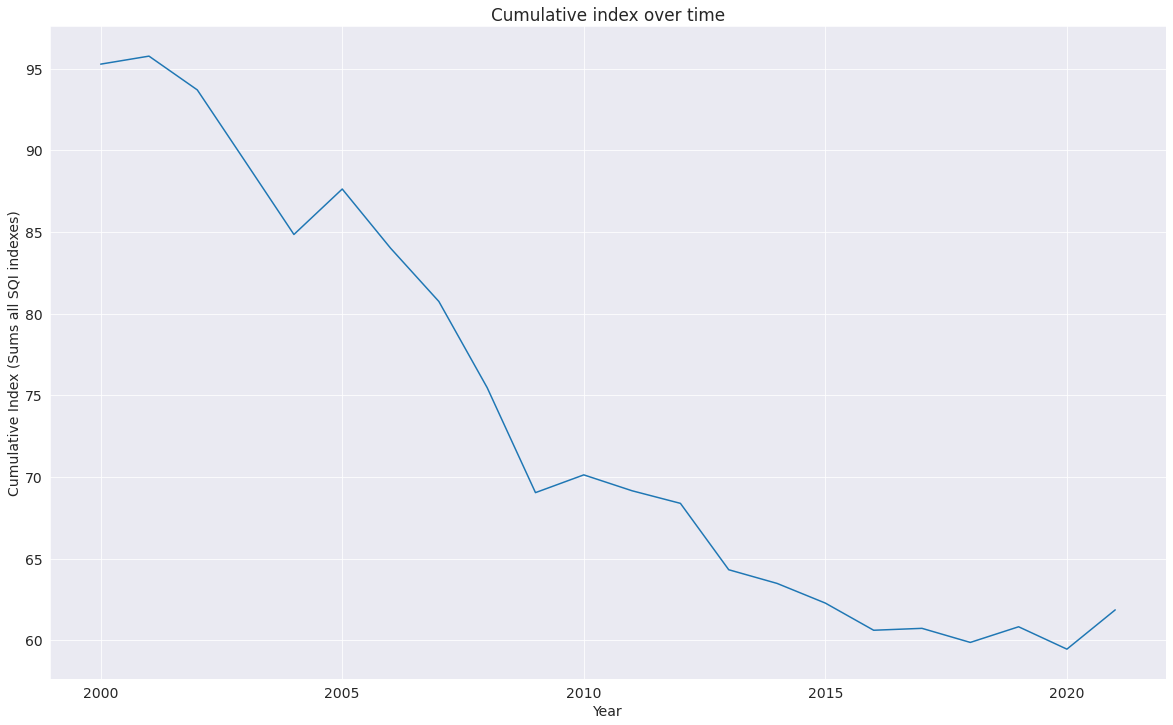

In [28]:
sns.set_style("darkgrid")

plt.figure(figsize=(20, 12))
years = pollution.groupby('Year')[['Cumulative Index']].mean()
years_list = []
for x in range(2000,2022):
    years_list.append(x)
plt.plot(years_list,years)
plt.title('Cumulative index over time')
plt.xlabel('Year')
plt.ylabel('Cumulative Index (Sums all SQI indexes)');



This graph here shows how the cumulative index (an overall measure of the trace gas concentrations in the atmosphere) decreases over time. As we can see, emissions are definitely going downwards. The historical context for this pattern is that in 1975, the Clean Air act was passed, which was an attempt from the government to control regulations of all these different, harmful gases.

How does the concentration of each individual gas change over the years?


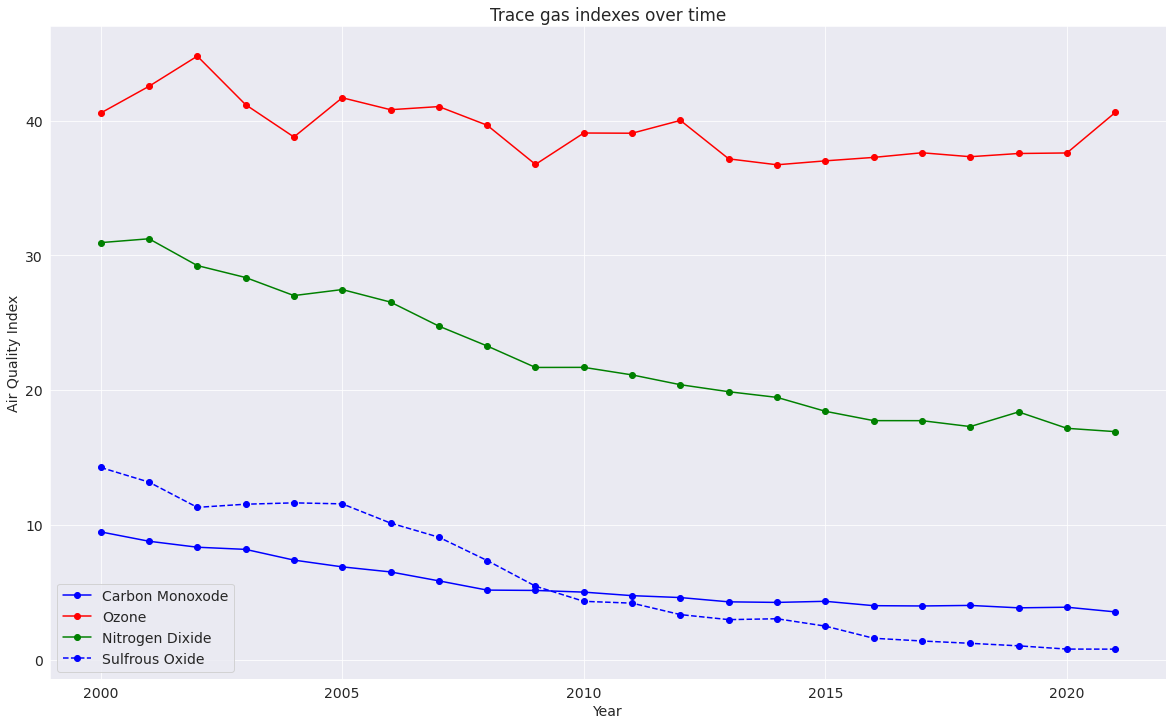

In [29]:
sns.set_style("darkgrid")

plt.figure(figsize=(20, 12))
CO_years = pollution.groupby('Year')[['CO AQI']].mean()
O3_years = pollution.groupby('Year')[['O3 AQI']].mean()
NO2_years = pollution.groupby('Year')[['NO2 AQI']].mean()
SO2_years = pollution.groupby('Year')[['SO2 AQI']].mean()

years_list = []
for x in range(2000,2022):
    years_list.append(x)
plt.plot(years_list,CO_years, 'o-b')
plt.plot(years_list,O3_years, 'o-r')
plt.plot(years_list,NO2_years, 'o-g')
plt.plot(years_list,SO2_years, 'o--b')

plt.xlabel('Year')
plt.ylabel('Air Quality Index');

plt.title("Trace gas indexes over time")
plt.legend(['Carbon Monoxode', 'Ozone', 'Nitrogen Dixide','Sulfur Dioxide']);

As you can see, concentrations of each individual gas has also decreased over time. I am using air quality index as the main measurement because different gases use different metrics for concentration (ppb vs ppm), and AQI is a relative index that can be compared across different gases.

Grouping by State to find some regional based data

Text(0, 0.5, 'Cumulative Index')

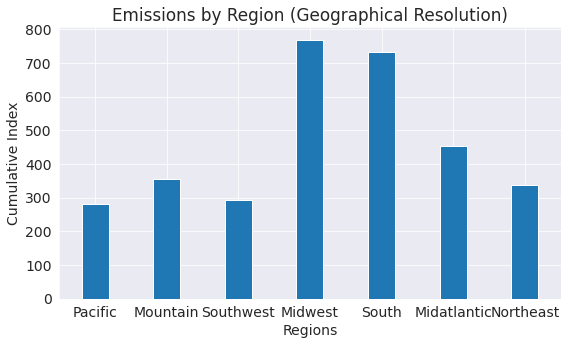

In [31]:
States = pollution.groupby('State')[['Cumulative Index']].mean()
pacific_total = 0
mountain_total = 0
southwest_total = 0
midwest_total = 0
south_total = 0
midatlantic_total = 0
northeast_total = 0
x_pos = [1,5,9,13,17,21,25]
regions = ['Pacific','Mountain','Southwest','Midwest','South','Midatlantic','Northeast']
#Let us do some geographical analysis by dividing the country into regions
Pacific = ['Washington','Oregon','California','Alaska','Hawaii']
Mountain = ['Nevada','Idaho','Colorado','Utah','Wyoming']
Southwest = ['Arizona','New Mexico','Texas','Oklahoma']
Midwest = ['North Dakota','South Dakota','Kansas','Minnesota','Iowa','Missouri','Illinois','Indiana','Ohio','Wisconsin','Michigan']
South = ['Arkansas','Louisiana','Mississippi','Alabama','Kentucky','Tennessee','Georgia','Florida','South Carolina','North Carolina','Virginia']
Midatlantic = ['Pennsylvania','New York','Maryland','Delaware','New Jersey','District Of Columbia']
Northeast = ['Connecticut','Rhode Island','Massachusetts','Vermont','New Hampshire','Maine']
total_list = []
for x in Pacific:
     pacific_total += States.loc[x]
     pacific_total = float(pacific_total)
total_list.append(pacific_total)

for x in Mountain:
    mountain_total += States.loc[x]
    mountain_total = float(mountain_total)
    
total_list.append(mountain_total)

for x in Southwest:
    southwest_total += States.loc[x]
    southwest_total = float(southwest_total)
total_list.append(southwest_total)

for x in Midwest:
    midwest_total += States.loc[x]
    midwest_total = float(midwest_total)
total_list.append(midwest_total)

for x in South:
    south_total += States.loc[x]
    south_total = float(south_total)
total_list.append(south_total)

for x in Midatlantic:
    midatlantic_total += States.loc[x]
    midatlantic_total = float(midatlantic_total)
total_list.append(midatlantic_total)

for x in Northeast:
    northeast_total += States.loc[x]
    northeast_total = float(northeast_total)
total_list.append(northeast_total)

plt.bar(x_pos, height=total_list, width=1.5)
plt.xticks(x_pos, regions)
plt.title("Emissions by Region (Geographical Resolution)")
plt.xlabel("Regions")
plt.ylabel("Cumulative Index")


As you can see, the regions that cause the most emissions/pollution are the Midwest and South where most of the US industrial plants are located.

In [33]:
Cali_list = []
z = 0
for x in pollution['State']:
    if x == 'California':
        Cali_list.append(pollution.loc[z])
    z+=1



In [34]:
Cali_list_df = pd.DataFrame(Cali_list)
Cali_list_df

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Cumulative Index
880,2000-01-01,2000,1,1,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.019412,0.029,13,27,0.572222,0.8,6,9.0,0.636364,2.0,9,3.0,14.782609,26.0,4,25,64.0
881,2000-01-02,2000,1,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.017471,0.032,9,30,0.520833,0.8,23,9.0,1.000000,2.0,5,3.0,16.043478,30.0,21,28,70.0
882,2000-01-03,2000,1,3,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.006353,0.014,8,13,1.133333,1.9,23,22.0,2.454545,4.0,13,6.0,25.521739,40.0,17,38,79.0
883,2000-01-04,2000,1,4,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.008176,0.011,13,10,1.408333,2.0,0,23.0,1.541667,4.0,17,6.0,26.041667,44.0,17,42,81.0
884,2000-01-05,2000,1,5,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.012412,0.022,8,20,0.941667,1.7,23,19.0,1.681818,4.0,10,6.0,23.772727,38.0,17,36,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594983,2021-09-26,2021,9,26,304 TUOLUMNE ST.,California,Solano,Vallejo,0.031353,0.037,7,34,0.200000,0.2,0,2.0,0.859091,1.0,10,1.0,1.108696,2.6,15,2,39.0
594984,2021-09-27,2021,9,27,304 TUOLUMNE ST.,California,Solano,Vallejo,0.022353,0.029,20,27,0.170833,0.2,0,2.0,0.836364,1.0,10,1.0,1.508696,3.7,17,3,33.0
594985,2021-09-28,2021,9,28,304 TUOLUMNE ST.,California,Solano,Vallejo,0.029647,0.036,9,33,0.166667,0.2,0,2.0,0.927273,1.0,8,1.0,3.117391,11.8,6,10,46.0
594986,2021-09-29,2021,9,29,304 TUOLUMNE ST.,California,Solano,Vallejo,0.022941,0.033,11,31,0.187500,0.2,0,2.0,1.031818,1.2,13,1.0,5.104348,15.6,22,14,48.0


(array([2.3891e+04, 9.9371e+04, 4.3790e+04, 1.2632e+04, 4.7050e+03,
        2.0710e+03, 7.0700e+02, 2.0900e+02, 2.5000e+01, 2.0000e+00]),
 array([  7. ,  41.8,  76.6, 111.4, 146.2, 181. , 215.8, 250.6, 285.4,
        320.2, 355. ]),
 <BarContainer object of 10 artists>)

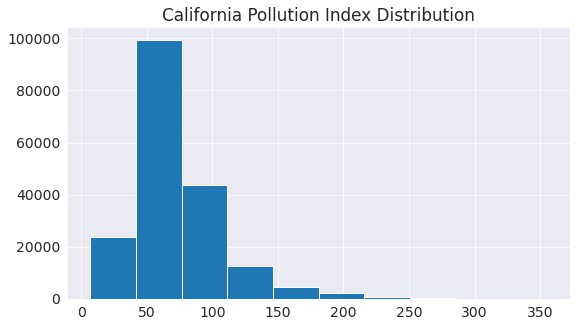

In [35]:
plt.title('California Pollution Index Distribution')
plt.hist(Cali_list_df['Cumulative Index'])

The distribution seems to be heavily skewed to the left, with most values between 50 and 75. This indicates that California has a decent pollution score, which is surprising considering all the toxic fumes released in all the numerous wildfires experienced in this state. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3af35cc220>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3af35cc940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3af35e4e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3af36360a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3af3636430>],
 'means': []}

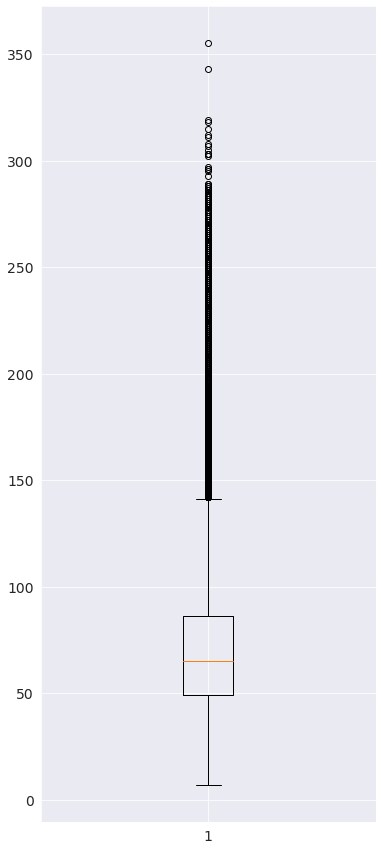

In [36]:
plt.figure(figsize=(6, 15))
plt.boxplot(Cali_list_df['Cumulative Index'])

Here is a boxplot for the California data, and this shows us that because this is such a large subset of data, there are many outliers. My guess is that these outliers are results of wildfires. The box is concentrated around data between 50 and 86, which is where most of the data is concentrated. The boxplot and histogram distribution essentially complement each other.

In [37]:
import jovian

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "adrij2005/pollution-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/adrij2005/pollution-analysis


'https://jovian.ai/adrij2005/pollution-analysis'

## Asking and Answering Questions

In this section, we will look to use the graphs and statistical analysis to answer 5 questions.


#### Q1: TODO - Which specific time periods in the US contributed to the most pollution in the past 10 years?

Let us use both a bar graph a heatmap to answer this question.

In [39]:
Z2 = []
Z3 = []
Z = []
z = 0
Sum = 0
for n in range(2009,2021):
    Z2 = []
    for i in range(1,13):
        Z = []
        z = 0
        Sum = 0
        for x in pollution['Year']:
            if x == n and pollution.loc[z]['Month'] == i:
                Z.append(pollution.loc[z]['Cumulative Index'])
                Sum+=pollution.loc[z]['Cumulative Index']
            
            z+=1
        Z2.append(Sum / len(Z))
    Z3.append(Z2)
    
        
#years.pivot(index='months', columns='bbb', values=)


Using some iterations and arrays, we can get a new data frame that has data for each month and year and can be loaded into the Seaborn library to create a heatmap.

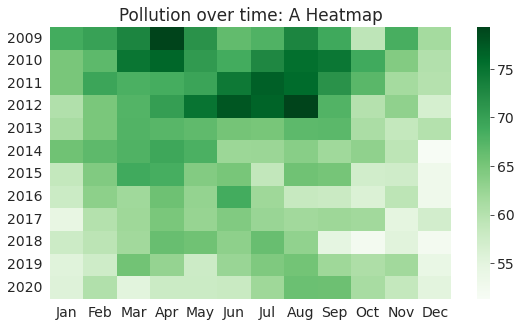

In [40]:
Z3 = pd.DataFrame(Z3)
Z3.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Z3.rename(index={0: 2009, 1:2010, 2:2011, 3:2012,4:2013,5:2014,6:2015,7:2016,8:2017,9:2018,10:2019,11:2020}, inplace=True)

plt.title("Pollution over time: A Heatmap")
plt.xlabel("Month")
plt.ylabel("Year")

sns.heatmap(Z3,fmt ="d", cmap='Greens');

As shown in the heatmap above, the summer months (Apr-Aug) have the highest index values, and these values decrease in size from 2010 to present

#### Q2: TODO - Which specific geographic regions contribute to most of the pollution?

Text(0, 0.5, 'Cumulative Index')

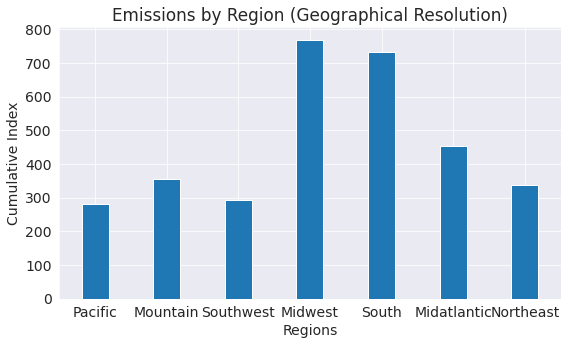

In [41]:
States = pollution.groupby('State')[['Cumulative Index']].mean()
pacific_total = 0
mountain_total = 0
southwest_total = 0
midwest_total = 0
south_total = 0
midatlantic_total = 0
northeast_total = 0
x_pos = [1,5,9,13,17,21,25]
regions = ['Pacific','Mountain','Southwest','Midwest','South','Midatlantic','Northeast']
#Let us do some geographical analysis by dividing the country into regions
Pacific = ['Washington','Oregon','California','Alaska','Hawaii']
Mountain = ['Nevada','Idaho','Colorado','Utah','Wyoming']
Southwest = ['Arizona','New Mexico','Texas','Oklahoma']
Midwest = ['North Dakota','South Dakota','Kansas','Minnesota','Iowa','Missouri','Illinois','Indiana','Ohio','Wisconsin','Michigan']
South = ['Arkansas','Louisiana','Mississippi','Alabama','Kentucky','Tennessee','Georgia','Florida','South Carolina','North Carolina','Virginia']
Midatlantic = ['Pennsylvania','New York','Maryland','Delaware','New Jersey','District Of Columbia']
Northeast = ['Connecticut','Rhode Island','Massachusetts','Vermont','New Hampshire','Maine']
total_list = []
for x in Pacific:
     pacific_total += States.loc[x]
     pacific_total = float(pacific_total)
total_list.append(pacific_total)

for x in Mountain:
    mountain_total += States.loc[x]
    mountain_total = float(mountain_total)
    
total_list.append(mountain_total)

for x in Southwest:
    southwest_total += States.loc[x]
    southwest_total = float(southwest_total)
total_list.append(southwest_total)

for x in Midwest:
    midwest_total += States.loc[x]
    midwest_total = float(midwest_total)
total_list.append(midwest_total)

for x in South:
    south_total += States.loc[x]
    south_total = float(south_total)
total_list.append(south_total)

for x in Midatlantic:
    midatlantic_total += States.loc[x]
    midatlantic_total = float(midatlantic_total)
total_list.append(midatlantic_total)

for x in Northeast:
    northeast_total += States.loc[x]
    northeast_total = float(northeast_total)
total_list.append(northeast_total)

plt.bar(x_pos, height=total_list, width=1.5)
plt.xticks(x_pos, regions)
plt.title("Emissions by Region (Geographical Resolution)")
plt.xlabel("Regions")
plt.ylabel("Cumulative Index")


This is one graph that shows emissions by region, let us try using geo-spatial data to create a more aesthetically pleasing map.

#### Q3: TODO - Which specific states contribute to most of the pollution?

In [42]:
pip install geopandas


     |████████████████████████████████| 1.0 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 30.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 93.8 MB/s eta 0:00:01
     |████████████████████████████████| 16.6 MB 22.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [43]:
import geopandas as gpd
geoData = gpd.read_file('s_11au16.shp')
geoData

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
5,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
6,CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
7,CT,Connecticut,09,-72.72623,41.62196,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
8,DC,District of Columbia,11,-77.01464,38.90932,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
9,DE,Delaware,10,-75.50592,38.99559,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."


Using the geopandas library, which analyzes geometric and shapefile datasets, we can create a plot of the US map

<AxesSubplot:>

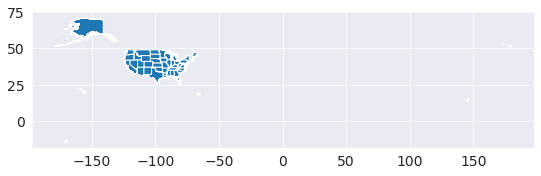

In [44]:
geoData.plot()

(25.0, 50.0)

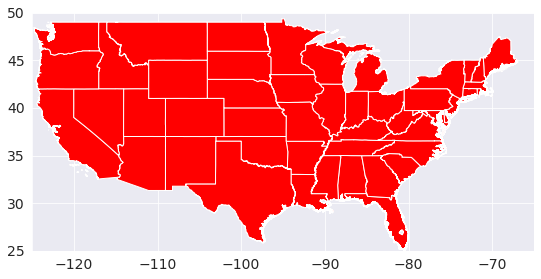

In [45]:
ax = geoData.plot()
#fig,ax = plt.subplots(figsize = (50, 50))
minx, miny, maxx, maxy = geoData.total_bounds
geoData.plot(ax=ax, color='red', markersize=20, marker = '+', label= 'pos')
ax.set_xlim(-125, -65)
ax.set_ylim(25,50)
#geoData.plot(ax=ax, color='red', markersize=20, marker = '+', label= 'pos')



In [46]:
states_list = []
a_list = []
for x in geoData['NAME']:
    states_list.append(x)
states_list
for x in states_list:
    if x not in Southwest and x not in Pacific and x not in Northeast and x not in Midwest and x not in South and x not in Southwest and x not in Midatlantic:
        a_list.append(0)
    else:
        a_list.append(States.loc[x]['Cumulative Index'])
a_list

[57.87598944591029,
 68.07446276861569,
 65.87003043999631,
 0,
 89.48979855928913,
 72.23460670320112,
 0,
 64.87585994455283,
 0,
 62.35231895850285,
 61.87787373798808,
 63.39313281873836,
 41.539690677604035,
 52.620391533339955,
 0,
 81.57095612552362,
 78.94587383266628,
 72.65024683408457,
 85.19451230971622,
 75.5927291216474,
 65.85621925509487,
 45.79754534593244,
 98.47520288548242,
 53.106048053024026,
 52.84046164290564,
 0,
 77.41517857142857,
 46.531590413943356,
 0,
 56.310845213849284,
 77.96225702962823,
 71.50577181208054,
 0,
 81.61427302062386,
 68.02785634696151,
 64.16993404177354,
 50.110071785947355,
 84.53242609464499,
 0,
 55.66589446589447,
 50.212702366127026,
 50.94054211600117,
 69.56650300353841,
 0,
 77.03824362606233,
 0,
 49.56402116402116,
 58.67230119093354,
 80.27934936350778,
 0,
 0,
 85.94553152534615,
 53.00357355568791,
 0,
 0,
 62.22166292134831,
 62.22166292134831]

In [47]:
geoData['Cumulative Index'] = a_list
geoData

,STATE,NAME,FIPS,LON,LAT,geometry,Cumulative Index
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",57.875989
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",68.074463
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",65.870030
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773...",0.000000
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",89.489799
5,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",72.234607
6,CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0...",0.000000
7,CT,Connecticut,09,-72.72623,41.62196,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ...",64.875860
8,DC,District of Columbia,11,-77.01464,38.90932,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ...",0.000000
9,DE,Delaware,10,-75.50592,38.99559,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ...",62.352319


Merging the original dataset with Cumulative Index

Text(0.5, 1.0, 'Pollution distribution over states')

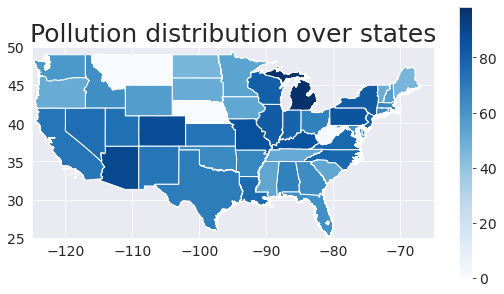

In [48]:
geoData.at[6, 'Cumulative Index'] = 87.321103
geoData.at[8, 'Cumulative Index'] = 83.448401
geoData.at[14, 'Cumulative Index'] = 62.508434
geoData.at[32, 'Cumulative Index'] = 74.897351
geoData.at[43, 'Cumulative Index'] = 74.187335
geoData.at[50, 'Cumulative Index'] = 56.866330

ax = geoData.plot()
#fig,ax = plt.subplots(figsize = (50, 50))
minx, miny, maxx, maxy = geoData.total_bounds
chloropleth = geoData.plot(column = "Cumulative Index"
                           ,cmap ="Blues", ax=ax, markersize=20, marker = '+', label= 'pos',legend=True)
ax.set_xlim(-125, -65)
ax.set_ylim(25,50)
ax.set_title('Pollution distribution over states', fontdict={'fontsize': '25', 'fontweight' : '3'})

#geoData.plot(ax=ax, color='red', markersize=20, marker = '+', label= 'pos')



From this chloropleth map, we can tell that Michigan is by far the biggest contributor to pollution, and that most of it seems to be concentrated in the Midwest/Southern regions, similar to what was shown in our bar graphs.

**Q4: Which gases have the highest effect on overall index?**

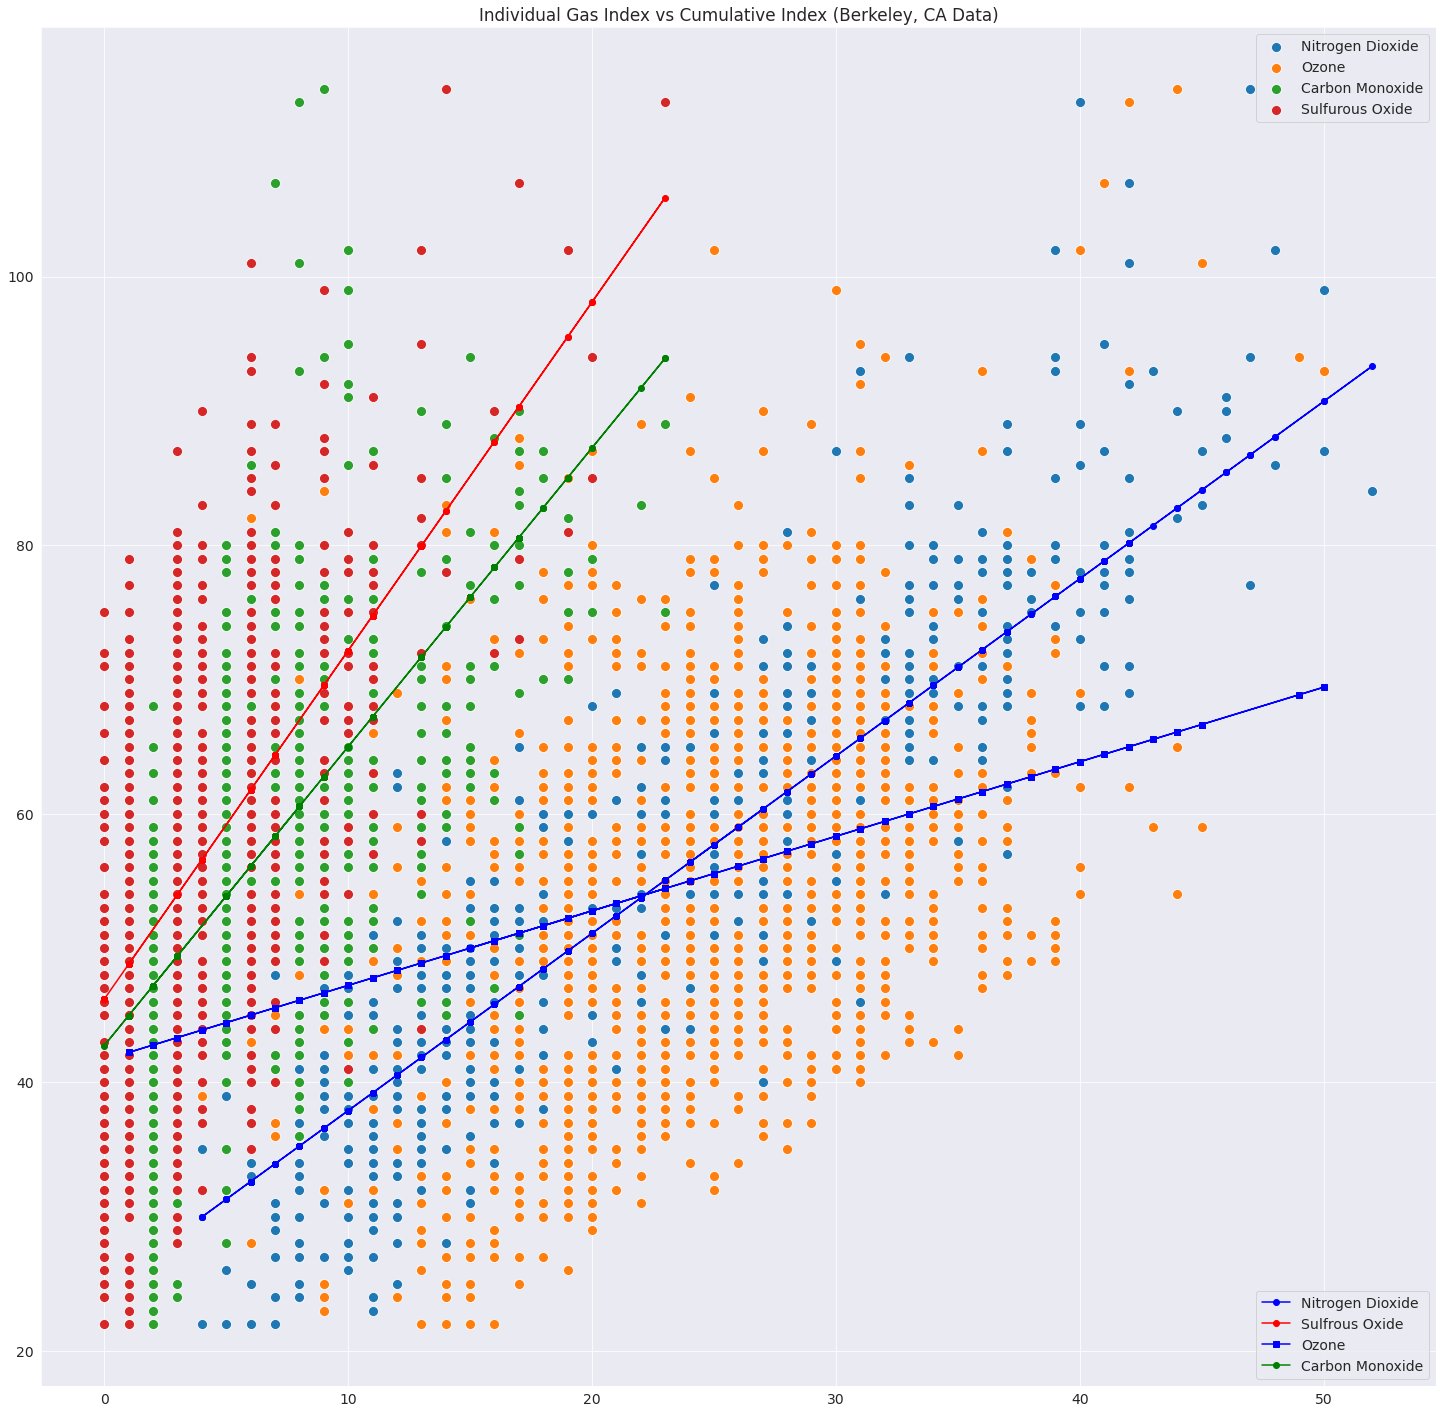

In [49]:
import random
import numpy as np
SO2_m_condensed = []
NO2_m_condensed = []
O3_m_condensed = []
CO_m_condensed = []

cm_list = []

safety = []
z = 0
for x in pollution['City']:
    if x == 'Berkeley':
        SO2_m_condensed.append(pollution.loc[z]['SO2 AQI'])
        NO2_m_condensed.append(pollution.loc[z]['NO2 AQI'])
        O3_m_condensed.append(pollution.loc[z]['O3 AQI'])
        CO_m_condensed.append(pollution.loc[z]['CO AQI'])

        cm_list.append(pollution.loc[z]['Cumulative Index'])
    z+=1

    
plt.figure(figsize=(25, 25))
plt.title('Individual Gas Index vs Cumulative Index (Berkeley, CA Data)')
#m, b = np.polyfit(NO2_m_condensed, NO2_f_condensed, 1)
sns.scatterplot(x=NO2_m_condensed,
                y=cm_list,
                s=100,
                palette = ['blue']);
sns.scatterplot(x=O3_m_condensed,
                y=cm_list,
                s=100,
                palette = ['orange']);
sns.scatterplot(x=CO_m_condensed,
                y=cm_list,
                s=100,
                palette = ['green']);
sns.scatterplot(x=SO2_m_condensed,
                y=cm_list,
                s=100,
                palette = ['red']);
first_legend = plt.legend(labels=["Nitrogen Dioxide","Ozone","Carbon Monoxide","Sulfur Dioxide"],loc=1)
a, b = np.polyfit(NO2_m_condensed, cm_list, 1)
a1, b1 = np.polyfit(SO2_m_condensed, cm_list, 1)
a2, b2 = np.polyfit(O3_m_condensed, cm_list, 1)
a3, b3 = np.polyfit(CO_m_condensed, cm_list, 1)

#print(m,b)
#plt.plot(x, m*x + b)
#print(x)
y_list = []
y1_list = []
y2_list = []
y3_list = []

for n in NO2_m_condensed:
    y_list.append(n * a + b)

for n in SO2_m_condensed:
    y1_list.append(n * a1 + b1)

for n in O3_m_condensed:
    y2_list.append(n * a2 + b2)

for n in CO_m_condensed:
    y3_list.append(n * a3 + b3)
    
    
plt.plot(NO2_m_condensed, y_list, 'o-b')
plt.plot(SO2_m_condensed, y1_list, 'o-r')
plt.plot(O3_m_condensed, y2_list, 's-b')
plt.plot(CO_m_condensed, y3_list, 'o-g')
plt.gca().add_artist(first_legend)

plt.legend(labels=["Nitrogen Dioxide","Sulfur Dioxide","Ozone","Carbon Monoxide"],loc='lower right')


As shown in the graph, the 2 gases that have the highest affect on the Cumulative Index are Ozone and Nitrogen Dioxide. These gases have a positive correlation and strong linear relationship with Cumulative Index (which means that an increase in their values usually tends to an increase in CI, compared to those of Sulfur Dioxide and Carbon Monoxide which are usually smaller and have lower impact on the said CI). Nitrogen Dioxide, which has a slope that is closest to 1, has the biggest impact on Cumulative Index. Keep in mind that this data is specific to Berkeley, California, as using a larger sample size would create an incoherent scatter plot. 

#### Q5: TODO - How does the variation of the gases change over the year?

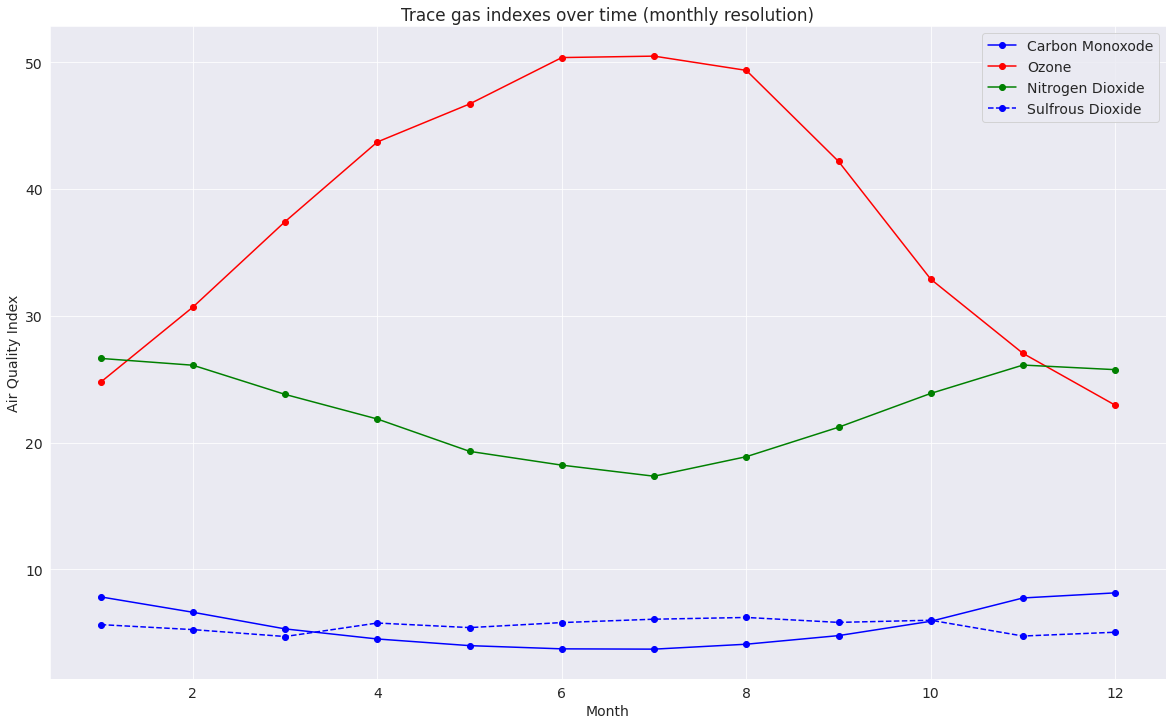

In [68]:
sns.set_style("darkgrid")

plt.figure(figsize=(20, 12))
CO_months = pollution.groupby('Month')[['CO AQI']].mean()
O3_months = pollution.groupby('Month')[['O3 AQI']].mean()
NO2_months = pollution.groupby('Month')[['NO2 AQI']].mean()
SO2_months = pollution.groupby('Month')[['SO2 AQI']].mean()

years_list = []
for x in range(1,13):
    years_list.append(x)
plt.plot(years_list,CO_months, 'o-b')
plt.plot(years_list,O3_months, 'o-r')
plt.plot(years_list,NO2_months, 'o-g')
plt.plot(years_list,SO2_months, 'o--b')

plt.xlabel('Month')
plt.ylabel('Air Quality Index');

plt.title("Trace gas indexes over time (monthly resolution)")
plt.legend(['Carbon Monoxode', 'Ozone', 'Nitrogen Dioxide','Sulfur Dioxide']);

Certain gases, like Carbon Monoxide and sulfur dioxide, rarely vary throughout the year. However, others such as ozone and nitrous dioxide do. Carbon monoxide and sulfur dioxide tend to stay at the same levels throughout the year because they are comparatively harder to find in the atmosphere and are emitted through pollution from cars and factories, which stay the same throughout the year. Nitrous dioxide emissions are analogous to amount of fertilizer used, and there is less fertilizer used during the summer, when crops heavily dependent on fertilizer are not grown as much. Ozone tends to increase during the summer because there is more direct sunlight and longer hours of sunlight means ground-level ozone compounds form more frequently. 

Let us save and upload our work to Jovian before continuing.

In [66]:
import jovian

In [67]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "adrij2005/pollution-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/adrij2005/pollution-analysis


'https://jovian.ai/adrij2005/pollution-analysis'

## Inferences and Conclusion

From the analysis we have completed in this mini-project, we can conclude that the overall presence of these banned gases have decreased significantly over time, but are still found in heavily industrialized places. Nitrous oxide and ozone are the most prevalent gases and have a higher impact on overall air quality and pollution than carbon monoxide and sulfur dioxide. In terms of geography, the Midwest emits the most pollution, particularly Michigan. We also discovered that during the summer times, when the surface temperature is hotter and US activity is generally higher, we see an increase in most of these gases, notably ozone. 

Although some improvement is needed and these gases still contribute to problems today, we can conclude that the Clean Air Act has been successfully implemented for the most part.

In [69]:
import jovian

In [70]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "adrij2005/pollution-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/adrij2005/pollution-analysis


'https://jovian.ai/adrij2005/pollution-analysis'

## References and Future Work

In the future, access to more greenhouse gas data would be incredibly useful in analyzing the affects of climate change, as gases such as carbon monoxide and water vapor are more common than the gases presented in this dataset. I next hope to move into doing actual machine learning and implementing models that can be used to further analyze such datasets. I might create a Medium post in the future.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [71]:
import jovian

In [72]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "adrij2005/pollution-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/adrij2005/pollution-analysis


'https://jovian.ai/adrij2005/pollution-analysis'